# redit recomendations
- recomend a subredit.
    + language was considered, to comp intensive.
- must use 1 cluster somewer at least....
- 1 custom module, ie: datatoolkit
- end product needs to be interactive. 
    + ie comandline projects,imput...
- should have error handling. 
    + no need fr exxesively crazy, but no crashing.
        - `data set` 
        +  

In [26]:
import pandas as pd
import numpy as np
import data_tools as dt
import sqlite3
import matplotlib.pyplot as plt
import networkx as nx
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from datetime import datetime,date

pd.set_option('display.float_format', lambda x: '%.5f' % x) # format reset.
np.random.seed(42)

In [27]:
def corr_matrix(df):
    corr_matrix = df.corr().abs()
    np.triu(np.ones(corr_matrix.shape), k = 1)
    tri = np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool)
    upper = corr_matrix.where(tri)
    to_drop = [col for col in upper.columns if any (upper[col]> .9)]
    return df.drop(df[to_drop], axis = 1)

In [28]:
def vis(df):
    vis = KElbowVisualizer(
        KMeans().fit(df),
        k= (2,51) # rainge of clusters...
    )
    vis.fit(df)
    return vis.elbow_value_

In [29]:
def graph_labels(df, items, models):
    fig, ax = plt.subplots( 1,2,figsize=(12,4))
    for i, key in enumerate(models.keys()):
        sns.scatterplot(
            data = df,
            x= items[0],
            y = items[1],
            hue = key,
            style= key, # cool substitute to color .
            palette = ['red','green','blue','yellow','orange','black'][:len(df[key].unique())],
            legend = False,
            ax= ax[i]
        ).set_title(key)
        ax[i].set(xlabel = None, ylabel = None)
    

In [30]:
connect = sqlite3.connect('reddit_data.db')

redit_data = pd.read_sql_query(
    
    """SELECT datetime(utc,'unixepoch') as datetime, utc as utc,username_id , subreddit_id 
    FROM Observation"""
    ,
    con = connect
)

In [32]:
redit_data.head()

,datetime,utc,username_id,subreddit_id
0,2016-12-26 10:24:59,1482747899.00000,17070,29539
1,2016-12-26 10:23:14,1482747794.00000,17070,6890
2,2016-12-26 10:21:16,1482747676.00000,17070,34139
3,2016-12-26 10:20:18,1482747618.00000,17070,21348
4,2016-12-26 10:17:59,1482747479.00000,17070,4215


In [33]:
redit_data[['username_id','subreddit_id']].to_csv('unclean_subreddit')
redit_data.head()

,datetime,utc,username_id,subreddit_id
0,2016-12-26 10:24:59,1482747899.00000,17070,29539
1,2016-12-26 10:23:14,1482747794.00000,17070,6890
2,2016-12-26 10:21:16,1482747676.00000,17070,34139
3,2016-12-26 10:20:18,1482747618.00000,17070,21348
4,2016-12-26 10:17:59,1482747479.00000,17070,4215


In [7]:
redit_data.dtypes

datetime         object
utc             float64
username_id       int64
subreddit_id      int64
dtype: object

In [8]:
user_count = redit_data['username_id'].unique().size
redit_coutn = redit_data['subreddit_id'].unique().size
print(f'number of users {user_count}\nnumber of subredits {redit_coutn}')

number of users 22610
number of subredits 34967


In [9]:
redit_data['datetime'] = pd.to_datetime(redit_data['datetime'])
redit_data['utc'] = redit_data['utc'].apply(int)
redit_data.dtypes

datetime        datetime64[ns]
utc                      int64
username_id              int64
subreddit_id             int64
dtype: object

In [34]:
reddata = redit_data.groupby(['subreddit_id']).filter(lambda x: len(x) >= 1000)
# reddata.sort_values(['username_id']).tail()
# reddit_v2 = reddata.apply(lambda X: x if x['username_id']>= 1000 else None)
# reddata.where(reddata['username_id']> 1000)
# reddit_v2.head()
reddata.shape

(12434406, 4)

In [35]:
# to_cut = reddata['subreddit_id']1

In [36]:
user_count = reddata['username_id'].unique().size
redit_coutn = reddata['subreddit_id'].unique().size
print(f'number of users {user_count}\nnumber of subredits {redit_coutn}')

number of users 22321
number of subredits 1573


## to csv 

In [37]:
reddata.to_csv('redit_data_clean.csv')

In [12]:
sample = (reddata.take(np.random.permutation(len(reddata))[:500000]))
sample.shape

(500000, 4)

In [ ]:
test_set = sample['username_id', 'subreddit_name'].getdummies('')

In [25]:
sample.head()

,datetime,utc,username_id,subreddit_id,kmeans,gmix
9790320,2016-12-16 01:37:52,1481852272,9145,25488,0,0
7122003,2016-09-07 23:20:17,1473290417,13964,29374,0,1
11184156,2016-12-23 16:55:49,1482512149,18327,18385,0,0
12094370,2013-07-27 23:18:08,1374967088,14618,1402,3,2
7618605,2016-12-23 10:51:12,1482490272,22349,31108,0,0


## clustering time
- I gues....

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

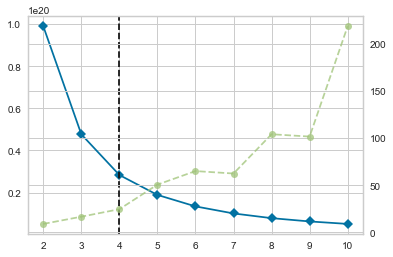

In [14]:
from sklearn.cluster import KMeans,DBSCAN

# dbs = DBSCAN(eps=.25).fit(sample) ## DBSCAN not an option. . . 
# set(dbs.labels_)

kmean = KMeans(n_clusters=vis(sample[['username_id','subreddit_id','utc']])
              ).fit(sample[['username_id','subreddit_id','utc']])
kmean

# elbows = vis(sample)  = 4
# elbows


In [20]:
from sklearn.mixture import GaussianMixture
gmix = GaussianMixture(n_components=4).fit(sample[['username_id','subreddit_id','utc']])
sample['gmix'] = pd.factorize(gmix.predict(sample[['username_id','subreddit_id','utc']]))[0]

C:\Users\Ed-Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\Ed-Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


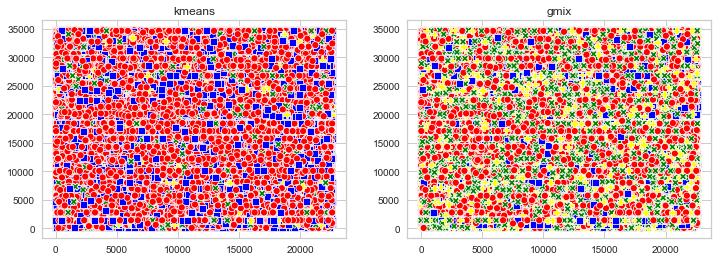

In [21]:
sample['kmeans'] = kmean.labels_
models= {
    'kmeans': kmean,
#     'dbscan': dbs,
#     'agglom': agglom,
    'gmix': gmix
}
graph_labels(sample, ['username_id','subreddit_id'],models)
